In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import os
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]=".8"

In [454]:
from __future__ import annotations
import networkx as nx
import jaxley as jx
from jaxley.io.tmp import swc_to_nx, compartmentalize, _add_jaxley_meta_data, _replace_branchpoints_with_edges, _build_module, read_swc, nx_to_pandas

import numpy as np
import matplotlib.pyplot as plt

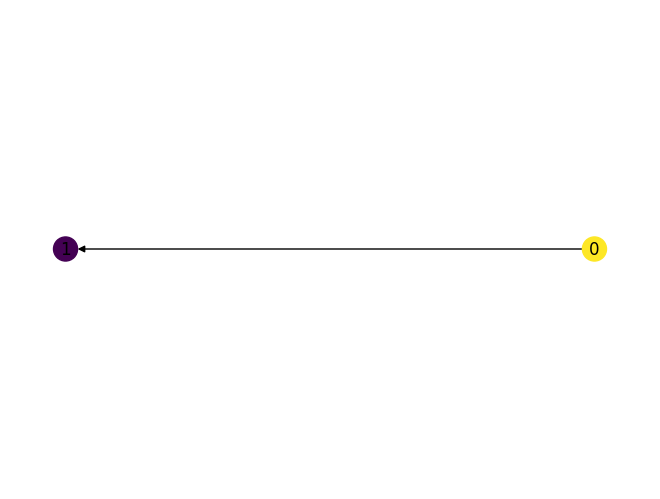

In [455]:
G = swc_to_nx("../jaxley/tests/swc_files/morph_interrupted_soma.swc")
G = compartmentalize(G, ncomp=1)
G = _add_jaxley_meta_data(G)
G = _replace_branchpoints_with_edges(G)

id_of_node = lambda d: d.get("soma", 0)*1 + d.get("axon", 0)*2 + d.get("basal", 0)*3 + d.get("apical", 0)*4
pos = {n:(data["x"], data["y"]) for n, data in G.nodes(data=True)}
colors = [data["id"] if "id" in data else id_of_node(data) for n, data in G.nodes(data=True)]
nx.draw(G, pos=pos, node_color=colors, with_labels=True)

In [456]:
swc_graph = swc_to_nx("../jaxley/tests/swc_files/morph_interrupted_soma.swc")
comp_graph = compartmentalize(swc_graph, ncomp=1)
comp_graph = _add_jaxley_meta_data(comp_graph)
solve_graph = _replace_branchpoints_with_edges(comp_graph)
cell = _build_module(solve_graph)

In [457]:
from jaxley.io.swc import read_swc as jx_read_swc
from time import perf_counter

testcases = [ 
"morph_3_types.swc",
"morph_interrupted_soma.swc",
"morph_soma_both_ends.swc",
"morph_somatic_branchpoint.swc",
"morph_non_somatic_branchpoint.swc", # no soma!
"morph_ca1_n120.swc",
"morph_l5pc_with_axon.swc",
"morph_3_types_single_point_soma.swc",
"morph_ca1_n120_single_point_soma.swc",
"morph_allen_485574832.swc",
]

for testcase in testcases:
    start = perf_counter()
    jx_cell = jx_read_swc(f"../jaxley/tests/swc_files/{testcase}", ncomp=1)
    end = perf_counter()
    jx_time = end - start
    start = perf_counter()
    new_cell = read_swc(f"../jaxley/tests/swc_files/{testcase}")
    end = perf_counter()
    new_time = end - start
    print(f"{testcase}: old={new_time:.3f}s | new={jx_time:.3f}s | new is {jx_time/new_time:.1f}x faster")

morph_3_types.swc: old=0.079s | new=0.115s | new is 1.5x faster
morph_interrupted_soma.swc: old=0.081s | new=0.092s | new is 1.1x faster
morph_soma_both_ends.swc: old=0.082s | new=0.099s | new is 1.2x faster
morph_somatic_branchpoint.swc: old=0.094s | new=0.111s | new is 1.2x faster
morph_non_somatic_branchpoint.swc: old=0.093s | new=0.125s | new is 1.3x faster
morph_ca1_n120.swc: old=0.439s | new=0.858s | new is 2.0x faster
morph_l5pc_with_axon.swc: old=0.980s | new=2.537s | new is 2.6x faster
morph_3_types_single_point_soma.swc: old=0.085s | new=0.111s | new is 1.3x faster
morph_ca1_n120_single_point_soma.swc: old=0.422s | new=0.894s | new is 2.1x faster
morph_allen_485574832.swc: old=0.338s | new=0.650s | new is 1.9x faster
